In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model 
import statsmodels.api as sm
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
automobile = pd.read_csv('C:/Users/lakshay/Desktop/data science/data_ss/Automobile_data.csv' ,encoding='ISO-8859-1',low_memory=False)
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
#cleaning of data
automobile.isnull().sum()
# Find out number of records having '?' value for normalized losses
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

In [9]:
# Setting the missing value to mean of normalized losses and conver the datatype to integer
nl = automobile['normalized-losses'].loc[automobile['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
automobile['normalized-losses'] = automobile['normalized-losses'].replace('?',nlmean).astype(int)
automobile['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [10]:
#cleaning price data
# Find out the number of values which are not numeric
automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [11]:
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
#Setting the missing value to mean of price and convert the datatype to integer
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

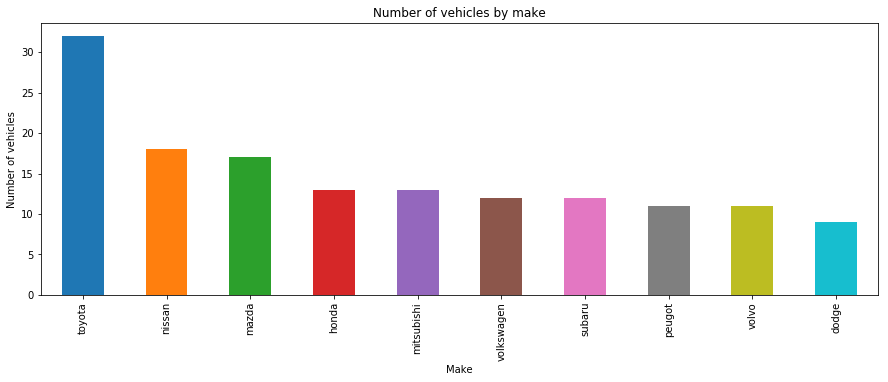

In [14]:
automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

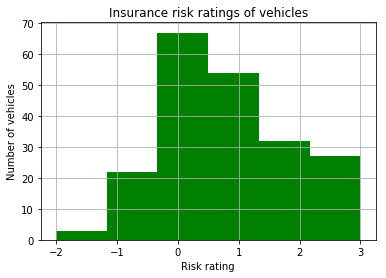

In [19]:
automobile.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

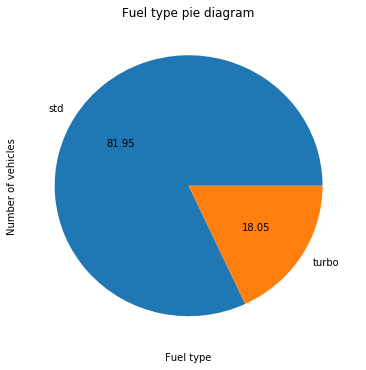

In [16]:
automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

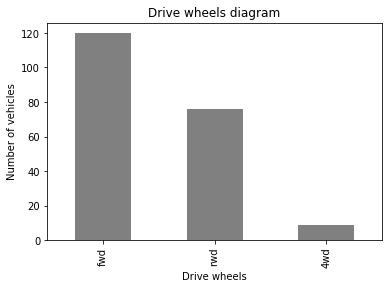

In [18]:
automobile['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

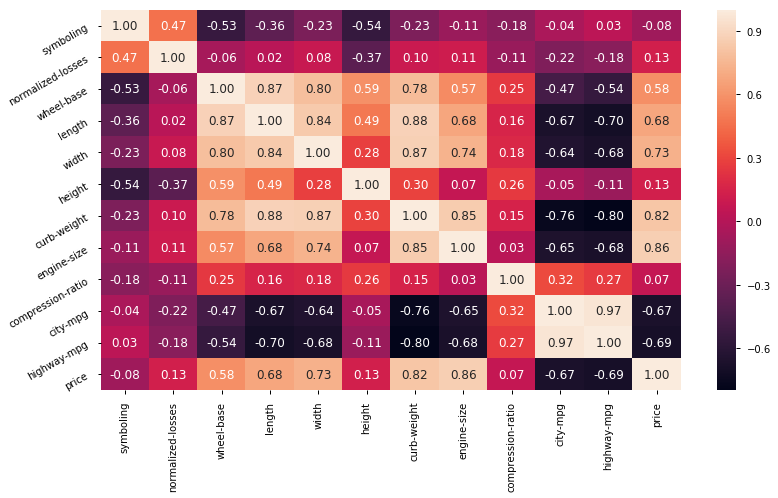

In [20]:
import seaborn as sns
corr = automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

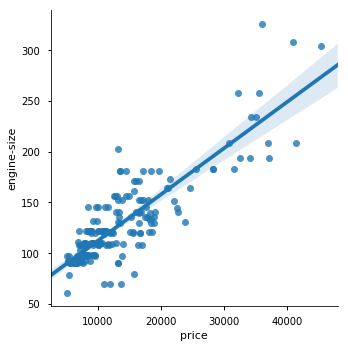

In [21]:
#Scatter plot of price and engine size Findings: The more the engine size the costlier the price is
g = sns.lmplot('price',"engine-size", automobile);
#regression model fits across a FacetGrid

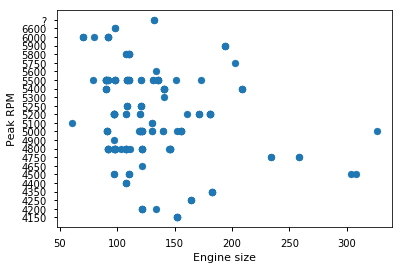

In [22]:
plt.scatter(automobile['engine-size'],automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

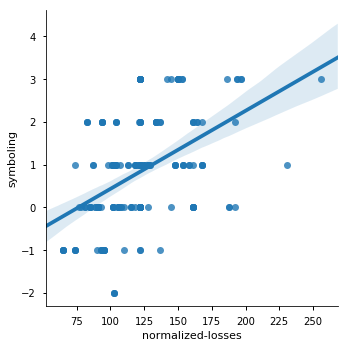

In [23]:
g = sns.lmplot('normalized-losses',"symboling", automobile);


Scatter plot of normalized losses and symboling

Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses

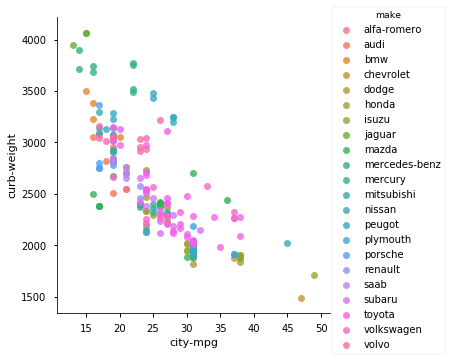

In [24]:
g = sns.lmplot('city-mpg',"curb-weight", automobile, hue="make", fit_reg=False);

the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight.

Heavier the Automobile less is the mileage for both City and Highwa

In [27]:
X_values=automobile[['engine-size']]
X_values

,engine-size
0,130
1,130
2,152
3,109
4,136
5,136
6,136
7,136
8,131
9,131


In [28]:
Y_values=automobile[['city-mpg']]

In [33]:
#train the model on data
body_reg=linear_model.LinearRegression()
body_reg.fit(X_values,Y_values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

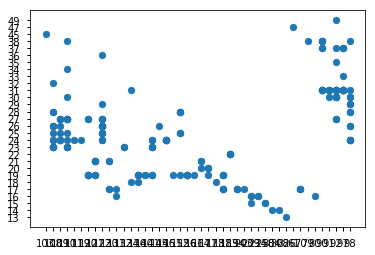

In [32]:
#visuliazing results
plt.scatter(X_values,Y_values)

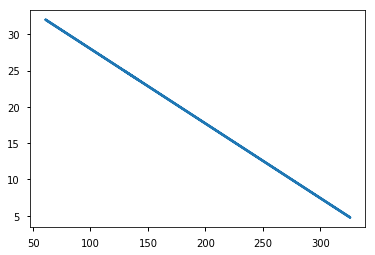

In [34]:
#predict the values of mpg 
plt.plot(X_values,body_reg.predict(X_values))
plt.show()

In [37]:
import statsmodels.api as sm
# Note the difference in argument order
model = sm.OLS(Y_values, X_values).fit()
predictions = model.predict(X_values) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               city-mpg   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     630.0
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           2.70e-64
Time:                        21:27:10   Log-Likelihood:                -814.86
No. Observations:                 205   AIC:                             1632.
Df Residuals:                     204   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
engine-size     0.1696      0.007     25.099      0.000       0.156       0.183
==============================================================================
Omnibus:                       23.634   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.003
Skew:                          -0.711   Prob(JB):                     6.82e-08
Kurtosis:                       4.357   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

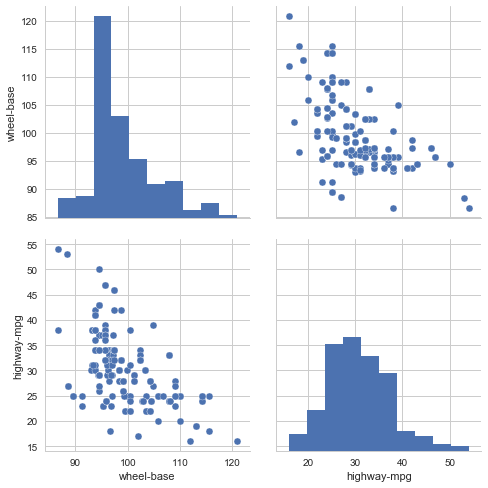

In [40]:
sns.set(style='whitegrid',context='notebook')
cols=['wheel-base','highway-mpg','body-style','num-of-doors','horsepower']
sns.pairplot(automobile[cols],size=3.5)
plt.show()
#pair plot is used to check the intensity of data values 